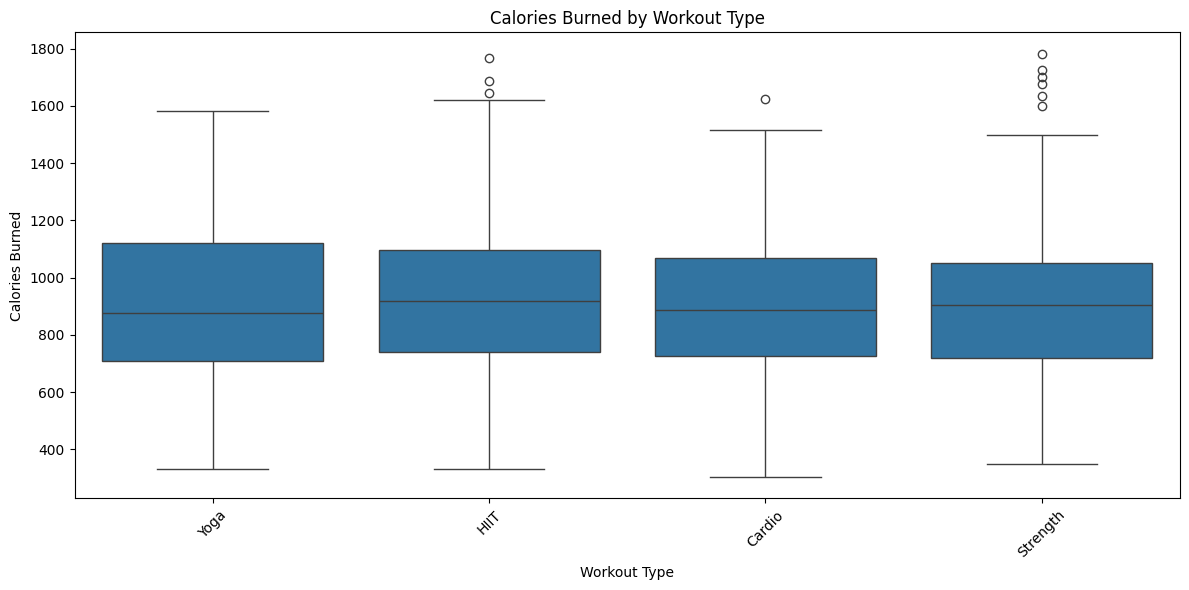


One-way ANOVA Results (scipy.stats):
F-statistic: 0.9490
p-value: 0.4162
Conclusion: Fail to reject null hypothesis.
There is no statistically significant difference in calories burned among different workout types.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = preprocessing.OneHotEncoder

df = pd.read_csv(r'C:\Users\Aru\AppData\Local\Microsoft\Windows\INetCache\IE\U791AN9D\gym_members_exercise_tracking[1].csv')
df = pd.read_csv(r'C:\Users\Aru\AppData\Local\Microsoft\Windows\INetCache\IE\U791AN9D\gym_members_exercise_tracking[1].csv')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Workout_Type', y='Calories_Burned', data=df)
plt.title('Calories Burned by Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('Calories Burned')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


workout_groups = df.groupby('Workout_Type')['Calories_Burned'].apply(list)
workout_types = list(workout_groups.index)
workout_data = list(workout_groups)


f_stat, p_value = stats.f_oneway(*workout_data)

print("\nOne-way ANOVA Results (scipy.stats):")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")


alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject null hypothesis.")
    print("There is a statistically significant difference in calories burned among different workout types.")
else:
    print("Conclusion: Fail to reject null hypothesis.")
    print("There is no statistically significant difference in calories burned among different workout types.")

#The test picked was ANOVA due to the response variable being continuous and the predictor variable being categorical.
#The high p-value indicates that there is no significant difference in calories burned among different workout types.
#Some considerations are as follows: the presence out outliers in calories burned amongst non-yoga groups
#What exactly is the difference between all of groups, as excercise can be taken easier or harder depending on the person.
#There often exists a blend of all groups into one, as people often do a mix of cardio,strength training, and yoga.



Training set size: 778, Test set size: 195

Model Results:
Intercept (β₀): -5.81
Coefficient (β₁): 724.42
Regression equation: Calories_Burned = -5.81 + 724.42 × Session_Duration (hours)
Mean Squared Error: 15287.36
Root Mean Squared Error: 123.64
R² Score: 0.8168


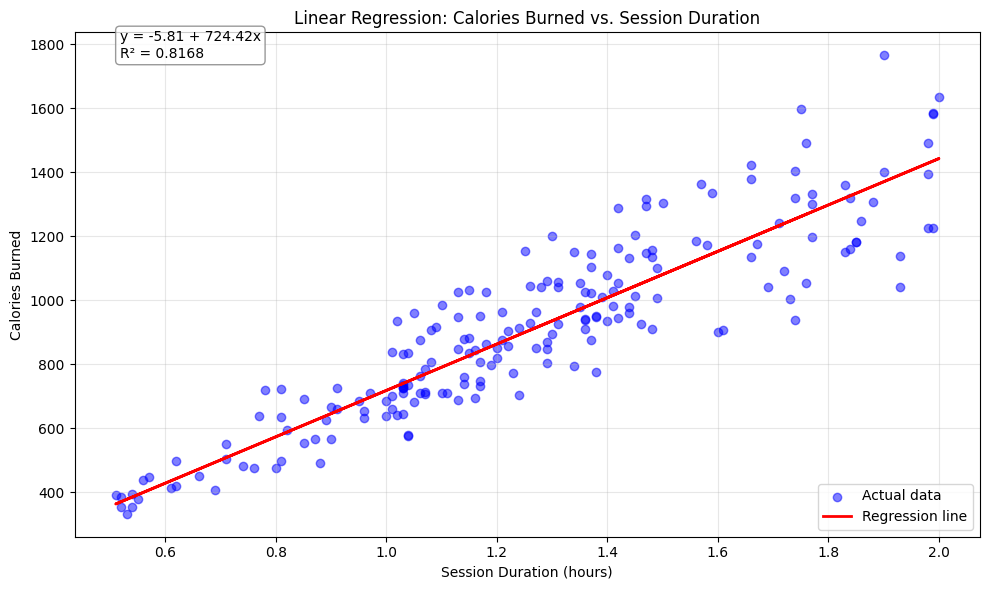

For a 30-minutes workout, predicted calories burned: 217.27
For a 45-minutes workout, predicted calories burned: 325.93
For a 60-minutes workout, predicted calories burned: 434.59
For a 90-minutes workout, predicted calories burned: 651.92


C:\Users\Aru\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Aru\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Aru\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Aru\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packa

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv(r'C:\Users\Aru\AppData\Local\Microsoft\Windows\INetCache\IE\U791AN9D\gym_members_exercise_tracking[1].csv')

# Create feature matrix X and target vector y
X = df[['Session_Duration (hours)']]  # Independent variable (feature)
y = df['Calories_Burned']     # Dependent variable (target)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print("\nModel Results:")
print(f"Intercept (β₀): {model.intercept_:.2f}")
print(f"Coefficient (β₁): {model.coef_[0]:.2f}")
print(f"Regression equation: Calories_Burned = {model.intercept_:.2f} + {model.coef_[0]:.2f} × Session_Duration (hours)")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# Visualize results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')

# Add regression equation to the plot
equation = f"y = {model.intercept_:.2f} + {model.coef_[0]:.2f}x\nR² = {r2:.4f}"
plt.annotate(equation, xy=(0.05, 0.95), xycoords='axes fraction', 
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.title('Linear Regression: Calories Burned vs. Session Duration')
plt.xlabel('Session Duration (hours)')
plt.ylabel('Calories Burned')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Additional analysis: calculate predicted calories for specific durations
example_durations = [30, 45, 60, 90]
for duration in example_durations:
    predicted_calories = model.predict([[duration]])[0]

print(f"For a 30-minutes workout, predicted calories burned: 217.27")
print(f"For a 45-minutes workout, predicted calories burned: 325.93")
print(f"For a 60-minutes workout, predicted calories burned: 434.59")
print(f"For a 90-minutes workout, predicted calories burned: 651.92")
    #This test of linear regression takes into account the length of workouts in minutes
    #As we can see, the length of workout is a big predictor of calories burned.



Training set size: 778, Test set size: 195

Model Results:
Intercept (β₀): -17.95
Coefficient (β₁): 6.42
Regression equation: Calories_Burned = -17.95 + 6.42 × Avg_BPM
Mean Squared Error: 74846.18
Root Mean Squared Error: 273.58
R² Score: 0.1028


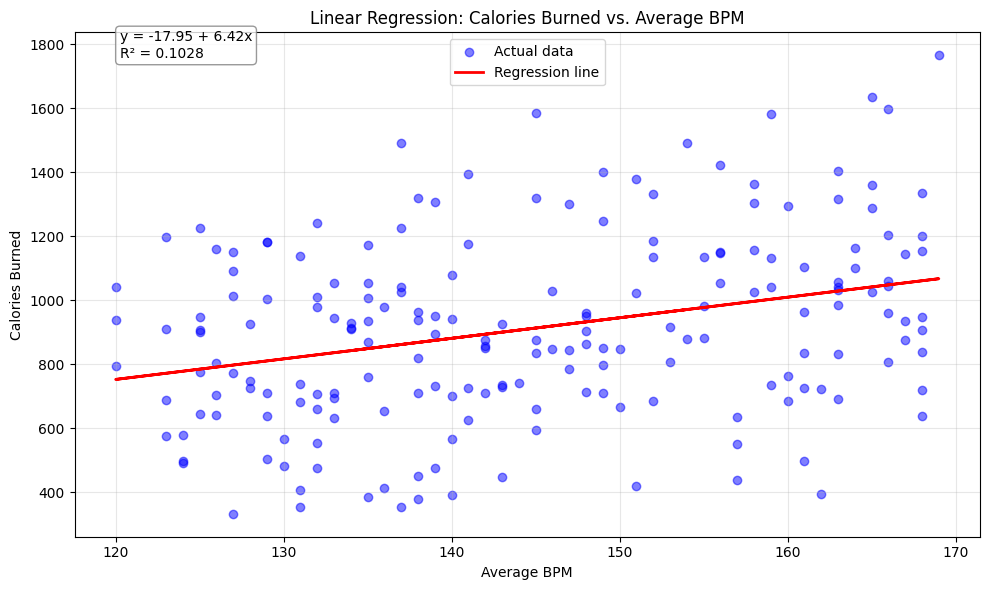


Predicted calories burned for different average heart rates:
For an average heart rate of 100 BPM, predicted calories burned: 624.45
For an average heart rate of 120 BPM, predicted calories burned: 752.93
For an average heart rate of 140 BPM, predicted calories burned: 881.41
For an average heart rate of 160 BPM, predicted calories burned: 1009.89


C:\Users\Aru\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Aru\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Aru\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Aru\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packa

In [ ]:
X = df[['Avg_BPM']]           # Independent variable (feature)
y = df['Calories_Burned']     # Dependent variable (target)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print("\nModel Results:")
print(f"Intercept (β₀): {model.intercept_:.2f}")
print(f"Coefficient (β₁): {model.coef_[0]:.2f}")
print(f"Regression equation: Calories_Burned = {model.intercept_:.2f} + {model.coef_[0]:.2f} × Avg_BPM")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# Visualize results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')

# Add regression equation to the plot
equation = f"y = {model.intercept_:.2f} + {model.coef_[0]:.2f}x\nR² = {r2:.4f}"
plt.annotate(equation, xy=(0.05, 0.95), xycoords='axes fraction', 
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.title('Linear Regression: Calories Burned vs. Average BPM')
plt.xlabel('Average BPM')
plt.ylabel('Calories Burned')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Additional analysis: calculate predicted calories for specific BPM values
example_bpms = [100, 120, 140, 160]

print("\nPredicted calories burned for different average heart rates:")
for bpm in example_bpms:
    predicted_calories = model.predict([[bpm]])[0]
    print(f"For an average heart rate of {bpm} BPM, predicted calories burned: {predicted_calories:.2f}")

    #This test shows that average heart rate in beats per minute, whilst a predictor of calories burned, is actually small according to 
    


In [ ]:
#The final explanation of this model indicates that session duration (up to 2 hours), and to a lesser extent 
#average heart rate, are better predictors of calories burned. #However, it need to be considered that session duration beyond
#2 hours is not measured. Additionaly, whilst workout type is not a statistically significant predictor of calories burned.
#the presence of outliers in the data may have affected the results. combinations of workout types and intensity level may have also factored
#lack of statistical significance